In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Conversions from pixels to micron and microns to pixels

pixels = 225
microns = 100
scale = pixels/microns
M2P = scale
P2M = 1/scale

row_length = 1600*P2M
col_length = 1200*P2M


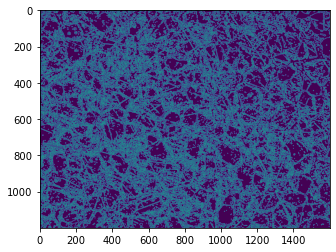

In [20]:
img =cv2.imread("E:/SS DATASET V2/2.jpg", 0)
canny = cv2.Canny(img,100,200)
plt.imshow(canny)
plt.show()

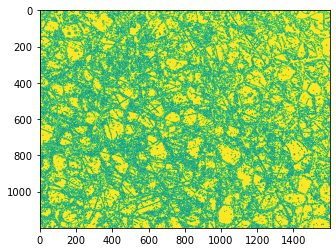

In [21]:
ret, threshCAN = cv2.threshold(canny,90,255,cv2.THRESH_BINARY_INV)
plt.imshow(threshCAN)
plt.show()

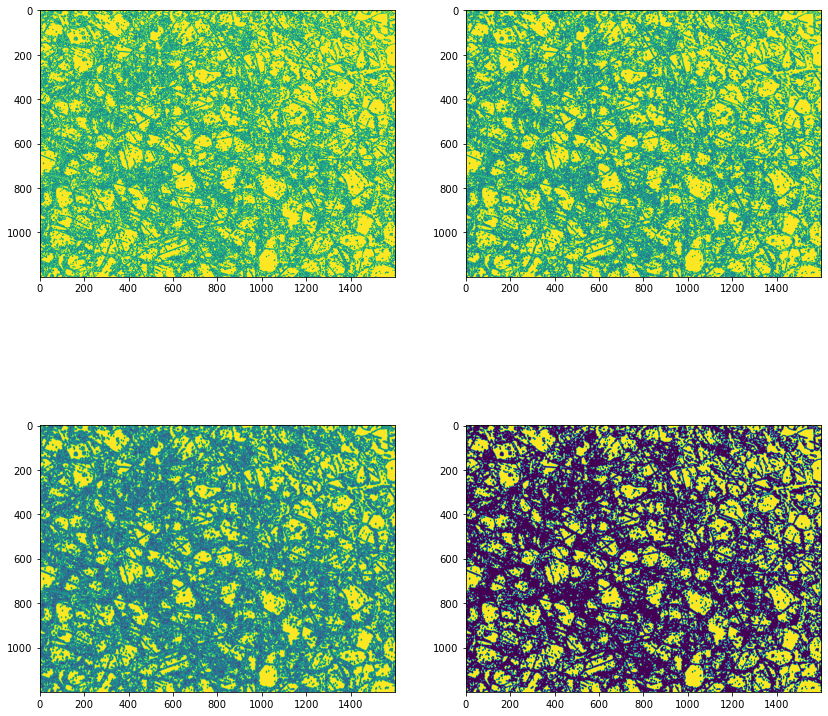

In [22]:
# Load canny image and blur blur erode erode blur blur erode
blur1 = cv2.GaussianBlur(threshCAN, (3,3), 0)
blur2 = cv2.GaussianBlur(blur1, (3,3), 0)
dil = cv2.erode(blur2, (5,5))
dil = cv2.erode(dil, (5,5))
dil = cv2.GaussianBlur(dil, (3,3), 0)
dil = cv2.GaussianBlur(dil, (3,3), 0)
dil = cv2.erode(dil, (5,5))

thresh1 = cv2.threshold(dil, 190, 255, cv2.THRESH_BINARY)[1]

plt.figure(figsize=(14,14))
plt.subplot(221)
plt.imshow(blur1)
plt.subplot(222)
plt.imshow(blur2)
plt.subplot(223)
plt.imshow(dil)
plt.subplot(224)
plt.imshow(thresh1) 
plt.show()

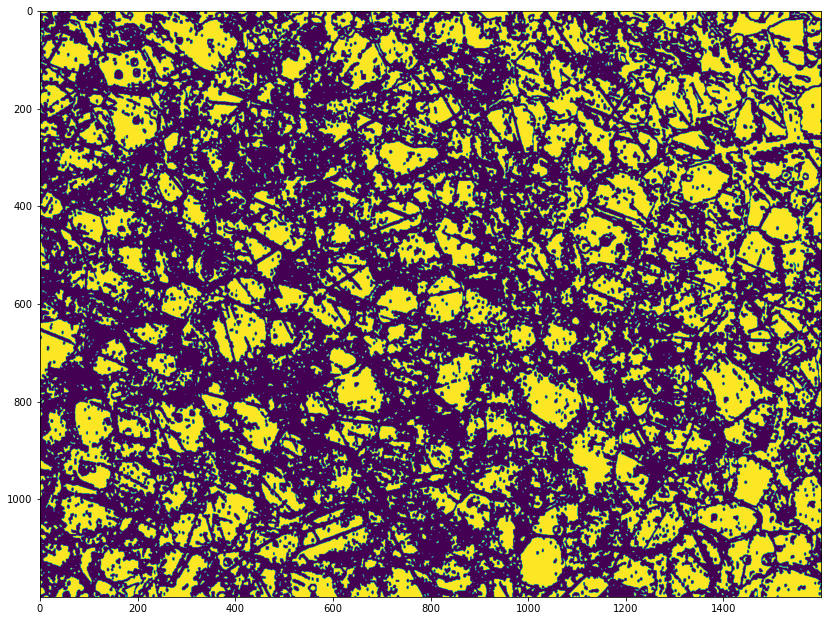

In [11]:
plt.figure(figsize=(14,14))
plt.imshow(thresh1) 
plt.show()

In [12]:
diff_x = np.diff(thresh1, axis=1)
diff_y = np.diff(thresh1, axis=0)

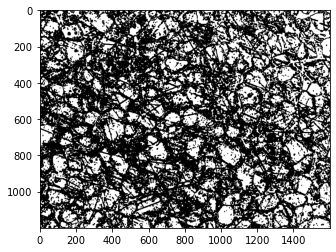

In [13]:
plt.imshow(thresh1, cmap='gray')
plt.show()

In [14]:
## Practice Block

# Choose the value to count (in this case, 1)
value = 255

# Initialize a counter
count = 0


# number of rows
numrows = 1200

# number of columns
numcols = 1600

Total_Grains_X = np.zeros(1200)

for x in range(numrows):
    # Initialize a counter
    count = 0
    # Iterate over the elements of the row
    for element in diff_x[x, :]:
        if element == value:
            count += 1
    Total_Grains_X[x] = count



In [15]:
print(Total_Grains_X)

[73. 71. 66. ... 65. 68. 67.]


In [16]:
Total_Grains_X.shape

(1200,)

In [17]:
# n = the number of files to sort through
n = 40

# Choose the value to count (in this case, 1)
value = 255

# Initialize a counter
count = 0

# number of rows
numrows = 1200

# number of columns
numcols = 1600

#zeros matrix for the grain measurements x = rows y = columns
Total_Grains_X = np.zeros((1200, 40))
Total_Grains_Y = np.zeros((1600, 40))

In [44]:
#FULL For Loop For Line Intercept Method

for t in range(n):

    img =cv2.imread("D:/GS/SS DATASET V2/"+ str(t+1) + ".jpg", 0)
    canny = cv2.Canny(img,100,200)
    ret, threshCAN = cv2.threshold(canny,90,255,cv2.THRESH_BINARY_INV)
    blur1 = cv2.GaussianBlur(threshCAN, (3,3), 0)
    blur2 = cv2.GaussianBlur(blur1, (3,3), 0)
    dil = cv2.erode(blur2, (5,5))
    dil = cv2.erode(dil, (5,5))
    dil = cv2.GaussianBlur(dil, (3,3), 0)
    dil = cv2.GaussianBlur(dil, (3,3), 0)
    dil = cv2.erode(dil, (5,5))
    thresh1 = cv2.threshold(dil, 190, 255, cv2.THRESH_BINARY)[1]
    
    _, binary = cv2.threshold(thresh1, 127, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
    black = np.zeros_like(img)
    
    for c in contours:
        # If the contour area is below the threshold, draw it on the black image
        if cv2.contourArea(c) > 100:
            cv2.drawContours(black, [c], -1, (255, 255, 255), -1)
            # Otherwise, draw it on the original image
        else:
             cv2.drawContours(img, [c], -1, (0, 255, 0), 2)
                
    # Save the image
    cv2.imwrite('D:/GS/FilteredGradV2/FGRAD' + str(t+1) + '.jpg', black)
                
    diff_x = np.diff(black, axis=1)
    diff_y = np.diff(black, axis=0)
    
    
    
    
    for x in range(numrows):
        # Initialize a counter
        count = 0
        # Iterate over the elements of the row
        for element in diff_x[x, :]:
            if element == value:
                count += 1
        Total_Grains_X[x, t] = count
        
    for y in range(numcols-1):
        # Initialize a counter
        count = 0
        # Iterate over the elements of the row
        for element in diff_y[:, y]:
            if element == value:
                count += 1
        Total_Grains_Y[y, t] = count
        
    # Save the image
    cv2.imwrite('D:/GS/FilteredGradV2/FGRAD' + str(t+1) + '.jpg', black)


In [45]:
#check for zeros
value_zero = 0

# Initialize a counter
count = 0

#just change the X and Y and the col number (a lot of zeros is a bad measure)
for element in Total_Grains_Y[:,1]:
    if element == value_zero:
        count += 1
print(count)

0


In [46]:
# Save the numpy array as a CSV

# save the array to a CSV file
np.savetxt("D:/GS/PAPER DATA and FIGURES/CSV Grain Data/Total_Grains_Y_Grad.csv", Total_Grains_Y, delimiter=",")
np.savetxt("D:/GS/PAPER DATA and FIGURES/CSV Grain Data/Total_Grains_X_Grad.csv", Total_Grains_X, delimiter=",")

In [47]:
#set all the zeros to one for averaging purposes

import numpy as np

Total_Grains_X[np.where(Total_Grains_X == 0)] = 1
Total_Grains_Y[np.where(Total_Grains_Y == 0)] = 1

In [48]:
AVG_GrainX_Grad = row_length/Total_Grains_X
AVG_GrainY_Grad = col_length/Total_Grains_Y

In [49]:
AVG_GrainY_Grad[1599,:]

array([533.33333333, 533.33333333, 533.33333333, 533.33333333,
       533.33333333, 533.33333333, 533.33333333, 533.33333333,
       533.33333333, 533.33333333, 533.33333333, 533.33333333,
       533.33333333, 533.33333333, 533.33333333, 533.33333333,
       533.33333333, 533.33333333, 533.33333333, 533.33333333,
       533.33333333, 533.33333333, 533.33333333, 533.33333333,
       533.33333333, 533.33333333, 533.33333333, 533.33333333,
       533.33333333, 533.33333333, 533.33333333, 533.33333333,
       533.33333333, 533.33333333, 533.33333333, 533.33333333,
       533.33333333, 533.33333333, 533.33333333, 533.33333333])

In [50]:
#delete column 1599 from AVG_GrainY_ManThresh it is messing up values
# all values are 533.3333???
AVG_GrainY_Grad = np.delete(AVG_GrainY_Grad, 1599, axis=0)

In [51]:
AVG_GrainY_Grad.shape

(1599, 40)

In [52]:
# Save the numpy array as a CSV

# save the array to a CSV file
np.savetxt("D:/GS/PAPER DATA and FIGURES/CSV Grain Data/AVG_GrainY_Grad.csv", AVG_GrainY_Grad, delimiter=",")
np.savetxt("D:/GS/PAPER DATA and FIGURES/CSV Grain Data/AVG_GrainX_Grad.csv", AVG_GrainX_Grad, delimiter=",")

In [53]:
meanX = np.mean(AVG_GrainX_Grad)
meanY = np.mean(AVG_GrainY_Grad)
STDX = np.std(AVG_GrainX_Grad)
STDY = np.std(AVG_GrainY_Grad)

In [54]:
print(meanX)
print(meanY)

20.856393743355152
22.6448786865785


In [55]:
print(STDX)
print(STDY)

10.898759608489023
5.987422385347254


In [ ]:
values = AVG_GrainX_ManThresh.flatten()

# plot the histogram
plt.hist(values, bins=100)
plt.show()

In [ ]:
values = AVG_GrainY_ManThresh.flatten()

# plot the histogram
plt.hist(values, bins=100)
plt.show()

In [ ]:
AVG_GrainY_ManThresh[1500,:]

In [ ]:
pic = AVG_GrainY_ManThresh

In [ ]:
plt.imshow(pic)
plt.show()